#Transfer Learning with **Resnet Training**(True) and **data augmentation** (False)


1.   Epochs=50
2.   Learning rate=0.0001
1.   Image size=(200,200)
2.   Image=Grayscale
1.   Defect_classes=['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
1.   batch_size=16
1.   optimizer=adam





















# Importing the libraries

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator #for data organised in folders

# Folder path and location

In [2]:
#for desktop
#path=r'./NEU Metal Surface Defects Data' 

In [3]:
# accessing data from colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# folder path for colab
path=r'/content/drive/MyDrive/Colab Notebooks/Tlab/NEU Metal Surface Defects Data'

# Contents and data organization within folder

In [5]:
print("Main Folder")
os.listdir(path)

Main Folder


['Thumbs.db', 'train', 'test', 'valid']

In [6]:
print("Train sub-folder")
os.listdir(path+'/train')

Train sub-folder


['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']

In [7]:
classes_defects=os.listdir(path+'/train')
print(classes_defects)

['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']


In [8]:
print("files within sub-folder Patches")
os.listdir(path+'/train/Patches')[:3]

files within sub-folder Patches


['Pa_206.bmp', 'Pa_165.bmp', 'Pa_145.bmp']

In [9]:
len(os.listdir(path+'/train'))

6

# Image characteristics

In [10]:
img1=Image.open(path+'/train/Patches/Pa_206.bmp')
print(img1.filename)
print(img1.format)
print(img1.mode)
print(img1.size)

# # The "L" mode represents grayscale here.... So it can hold any of 256 shades of Gray 
# (includes black and white as Gray shades).
# # The "P" mode can hold 256 different colors like red,blue, green etc....
# https://stackoverflow.com/questions/52307290/what-is-the-difference-between-images-in-p-and-l-mode-in-pil#:~:text=Examples%3A%208%20bit%20black%20and,are%20%22P%22%20mode..

/content/drive/MyDrive/Colab Notebooks/Tlab/NEU Metal Surface Defects Data/train/Patches/Pa_206.bmp
BMP
L
(200, 200)


(200, 200)
max_pixel_value: 255


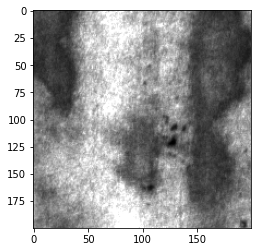

In [11]:
image=plt.imread(path+'/train/Patches/Pa_206.bmp')
print(image.shape)
plt.imshow(image,cmap='gray')
print("max_pixel_value: {}".format(image.max()))

# ImageDataGenerator and flow_from_directory for datasets

Sources:

1.   https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720
2.   https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/TensorFlow/Basics/tutorial18-customdata-images/1_in_subfolders.py



In [12]:
data_generator=ImageDataGenerator(
    rescale=1.0/255,
    dtype=tf.float32
)

# Train dataloader

In [13]:
train_ds=data_generator.flow_from_directory(
    path+'/train',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=True,
    seed=1,
    batch_size=16
)

Found 1667 images belonging to 6 classes.


# Valid dataloader

In [14]:
valid_ds=data_generator.flow_from_directory(
    path+'/valid',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=True,
    seed=1,
    batch_size=16
)

Found 72 images belonging to 6 classes.


# Test dataloader

In [93]:
test_ds=data_generator.flow_from_directory(
    path+'/test',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=False,
    seed=1,
    batch_size=1
)

Found 72 images belonging to 6 classes.


# Dataloader sanity check

In [16]:
print("Dataloader_length(Images,labels)", len(train_ds[0]))
print("image list length",len(train_ds[0][0]))
print("image shape", train_ds[0][0].shape)
print("Defect List: ",classes_defects)
print("Defect dictionary in dataloader: ",train_ds.class_indices)
print(train_ds.labels[1660])
print(train_ds.classes)
print(train_ds.class_indices.keys())
print(train_ds.class_indices.values())
#print([train_ds.class_indices(x)] for x in train_ds.classes])

Dataloader_length(Images,labels) 2
image list length 16
image shape (16, 200, 200, 3)
Defect List:  ['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']
Defect dictionary in dataloader:  {'Inclusion': 0, 'Patches': 1, 'Crazing': 2, 'Pitted': 3, 'Scratches': 4, 'Rolled': 5}
5
[0 0 0 ... 5 5 5]
dict_keys(['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled'])
dict_values([0, 1, 2, 3, 4, 5])


Image_shape:  (16, 200, 200, 3)
Label_value:  3.0
['Inclusion', 'Patches', 'Crazing', 'Pitted', 'Scratches', 'Rolled']
tf.Tensor([3 0 5 3 0 3 0 5 4 2 0 3 4 3 0 1], shape=(16,), dtype=uint8)
Pitted


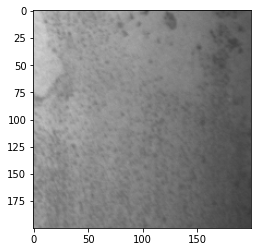

In [17]:
for images,labels in train_ds:
  plt.imshow(images[0],cmap='gray')
  print("Image_shape: ",images.shape)
  print("Label_value: ",labels[0])
  labels=tf.cast(labels,tf.uint8)
  print(classes_defects)
  print((labels))
  print(classes_defects[labels[0]])
  break

In [18]:
#

# Model architecture and Pretrained model import from keras

Sources:


1.   https://keras.io/api/applications/
2.   https://towardsdatascience.com/transfer-learning-for-image-classification-using-tensorflow-71c359b56673



In [19]:
from tensorflow.keras.applications import ResNet50

In [20]:
feature_extractor=ResNet50(weights='imagenet',input_shape=(224,224,3),include_top=True) #end layer of 1000, no need for average pooling
feature_extractor.trainable=True

In [21]:
data_aug=keras.Sequential([
                           tf.keras.Input(shape=(200,200,3)),
                           layers.experimental.preprocessing.Resizing(height=224,width=224),
                          #  layers.experimental.preprocessing.RandomContrast(factor=0.25),
                          #  layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
                          #  layers.experimental.preprocessing.RandomZoom(0.5,0.6),
                          #  layers.experimental.preprocessing.RandomRotation(0.5),
                          #  layers.experimental.preprocessing.RandomTranslation(0.2,0.2),

])

In [22]:
input_=tf.keras.Input(shape=(200,200,3))
x=data_aug(input_)
x=feature_extractor(x,training=True)
# x = tf.keras.layers.GlobalAveragePooling2D()(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dense(64,activation='relu')(x)
x=layers.Dense(32,activation='relu')(x)
output_=layers.Dense(6)(x)

In [23]:
model=keras.Model(input_,output_)

# Final Model architecture summary

In [24]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense (Dense)               (None, 128)               128128    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 6)                 198   

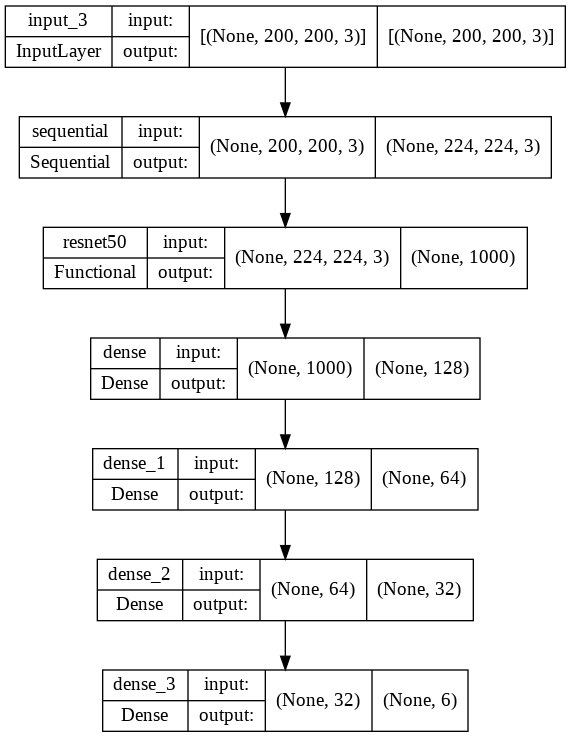

In [25]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Model training

In [26]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.0001),
              metrics=['accuracy'],
              )

In [27]:
history=model.fit(train_ds, epochs=50, verbose=True,validation_data=valid_ds)

Epoch 1/50
105/105 [==============================] - 954s 9s/step - loss: 1.7324 - accuracy: 0.6089 - val_loss: 1.6549 - val_accuracy: 0.8194
Epoch 2/50
105/105 [==============================] - 20s 186ms/step - loss: 1.5975 - accuracy: 0.8716 - val_loss: 1.5022 - val_accuracy: 0.8750
Epoch 3/50
105/105 [==============================] - 20s 186ms/step - loss: 1.3686 - accuracy: 0.8908 - val_loss: 1.1517 - val_accuracy: 0.9861
Epoch 4/50
105/105 [==============================] - 19s 181ms/step - loss: 1.0278 - accuracy: 0.9352 - val_loss: 0.8205 - val_accuracy: 0.9583
Epoch 5/50
105/105 [==============================] - 19s 181ms/step - loss: 0.7170 - accuracy: 0.9280 - val_loss: 0.4932 - val_accuracy: 0.9861
Epoch 6/50
105/105 [==============================] - 19s 183ms/step - loss: 0.4096 - accuracy: 0.9676 - val_loss: 0.2798 - val_accuracy: 0.9861
Epoch 7/50
105/105 [==============================] - 19s 184ms/step - loss: 0.3442 - accuracy: 0.9454 - val_loss: 0.3292 - val_accu

# Test dataloader evaluation, Saving and loading weights

In [28]:
model.evaluate(test_ds)

1/1 [==============================] - 2s 2s/step - loss: 0.0023 - accuracy: 1.0000


[0.0022978822235018015, 1.0]

In [26]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Tlab')

In [ ]:
# For creating new directory
#os.makedirs('Resnet50/Resnet50_training_true_aug_false')

In [27]:
os.chdir('./Resnet50/Resnet50_training_true_aug_false')

In [32]:
#For saving weights
#model.save_weights('training_cp.ckpt')

In [28]:
model_new=keras.Model(input_,output_)

In [29]:
model_new.load_weights('./training_cp.ckpt')

In [30]:
model_new.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.0001),
              metrics=['accuracy'],
              )

In [94]:
model_new.evaluate(test_ds)

72/72 [==============================] - 1s 18ms/step - loss: 1.1677 - accuracy: 0.6528


[1.1676706075668335, 0.6527777910232544]

# Training Performance

In [ ]:
history.history.keys()

Loss vs epochs

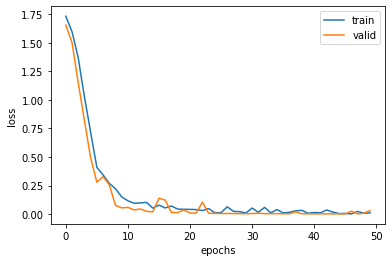

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])

Accuracy vs epochs

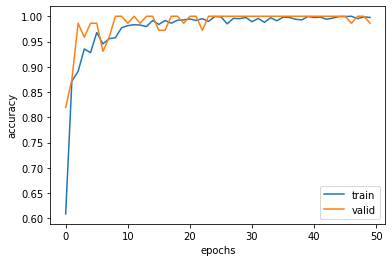

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','valid'])

# Predictions

In [33]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [95]:
X_test=[]
y_test=[]
for i in range(len(test_ds)):
  dataiter = iter(test_ds)
  images, labels = dataiter.next()
  X_test.extend(images)
  y_test.extend(labels)

In [96]:
print(len(X_test))

72


In [97]:
y_test=[int(x) for x in y_test]
print(y_test)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [78]:
y_predict=model_new.predict(np.array(X_test))
print(y_predict[:2])
y_hat=[np.argmax(x) for x in y_predict]
print(y_hat)

[[ 6.1353064  -0.9641483  -2.1077132   0.38586646  1.1473246  -2.083611  ]
 [ 6.8160954  -1.0247848  -1.9808996  -0.03336892  0.5649472  -2.1915116 ]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 0, 5, 3, 5, 0, 5, 5, 4]


In [98]:
print(classification_report(y_test, y_hat, target_names=classes_defects))

              precision    recall  f1-score   support

   Inclusion       0.86      1.00      0.92        12
     Patches       1.00      1.00      1.00        12
     Crazing       1.00      1.00      1.00        12
      Pitted       0.92      1.00      0.96        12
   Scratches       0.92      1.00      0.96        12
      Rolled       1.00      0.67      0.80        12

    accuracy                           0.94        72
   macro avg       0.95      0.94      0.94        72
weighted avg       0.95      0.94      0.94        72



In [99]:
print(confusion_matrix(y_test, y_hat))

[[12  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 2  0  0  1  1  8]]


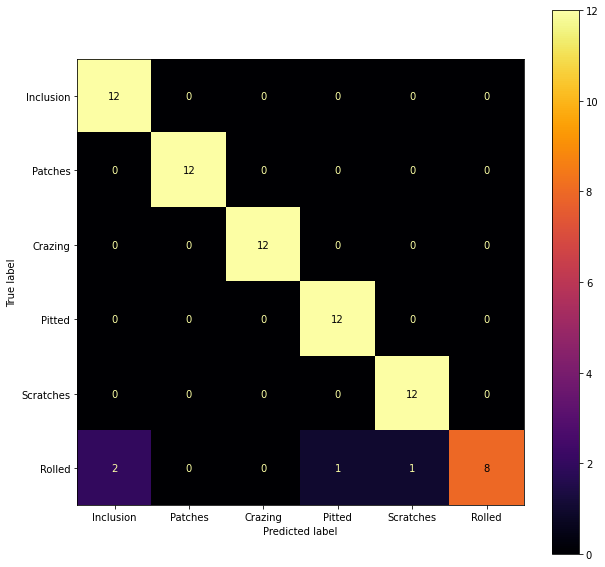

In [100]:
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat),display_labels=classes_defects)
fig,ax=plt.subplots(figsize=(10,10))
cmd.plot(ax=ax,cmap="inferno")

In [48]:
# import numpy as np
# sample=np.expand_dims(X_test[0],axis=0)
# print(sample.shape)
# sample_predict=model.predict(sample)
# plt.imshow(X_test[0],cmap='gray')
# print(sample_predict, "Max: ", np.argmax(sample_predict))
# print("predicted label: ",classes_defects[np.argmax(sample_predict)])
# print("Actual label: ",classes_defects[int(y_test[0])])

In [48]:
# sample = iter(test_ds)
# images, labels = sample.next()
# print(images.shape)
# sample_predict=model.predict(images)
# plt.imshow(images,cmap='gray')
# print(sample_predict, "Max: ", np.argmax(sample_predict))
# print("predicted label: ",classes_defects[np.argmax(sample_predict)])
# print("Actual label: ",classes_defects[int(labels)])